In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\numan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [185]:
df = pd.read_csv("data_news - data_news.csv")

In [187]:
df.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [195]:
df.describe()

,category,headline,links,short_description,keywords
count,50000,50000,50000,50000,47332
unique,10,45577,45745,45743,41558
top,WELLNESS,Sunday Roundup,https://www.huffingtonpost.com/entry/bryce-har...,"Along with his fists, the star Nationals outfi...",post
freq,5000,22,8,8,85


In [197]:
df.isnull().sum()

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

In [199]:
# Dropping null values from the dataset
df.dropna(inplace = True)

In [201]:
df.isnull().sum()

category             0
headline             0
links                0
short_description    0
keywords             0
dtype: int64

In [206]:
# Dropping "links" column as it is not necessary for analysis
df = df.drop(columns = ["links"])

In [208]:
df.shape

(47332, 4)

In [210]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Preprocessing function
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r"[^\w\s]", "", text) # Remove punctuation
    text = re.sub(r"\d+", "", text) # Remove numbers
    words = word_tokenize(text) # Tokenization
    words = [word for word in words if word not in stop_words] # Remove stopwords
    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatization
    return " ".join(words) # Convert list back to string
# Apply the function to text columns

text_columns = ["headline", "short_description", "keywords"]
for col in text_columns:
    df[col] = df[col].apply(preprocess_text)

In [212]:
df.head()

,category,headline,short_description,keywords
0,WELLNESS,mile day lesson learned,resting part training ive confirmed sort alrea...,runninglessons
1,WELLNESS,talking crazy crazy helpful,think talking tool coach challenge narrate exp...,talkingtoyourselfcrazy
2,WELLNESS,crenezumab trial gauge whether alzheimers drug...,clock ticking united state find cure team work...,crenezumabalzheimersdiseasedrug
3,WELLNESS,oh difference made,want busy keep trying perfect want happy focus...,meaningfullife
4,WELLNESS,green superfoods,first bad news soda bread corned beef beer hig...,greensuperfoods


In [220]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine headline, short description, and keywords
df["combined_text"] = df["headline"] + " " + df["short_description"] + " " + df["keywords"]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the combined text data
X_tfidf = tfidf_vectorizer.fit_transform(df["combined_text"])

# Convert to a DataFrame for better understanding
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display shape and first few rows
print("TF-IDF Feature Shape:", tfidf_df.shape)
tfidf_df.head()

TF-IDF Feature Shape: (47332, 5000)


,aaron,abandoned,abc,ability,able,aboard,abortion,abroad,absence,absolute,...,youre,youth,youtube,youve,zealand,zen,zero,zika,zoe,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
# Count articles per category
category_counts = df["category"].value_counts()

# Display category distribution
category_counts

category
TRAVEL            4865
FOOD & DRINK      4863
ENTERTAINMENT     4855
WORLD NEWS        4851
SPORTS            4759
WELLNESS          4741
POLITICS          4712
STYLE & BEAUTY    4708
BUSINESS          4512
PARENTING         4466
Name: count, dtype: int64

C:\Users\numan\AppData\Local\Temp\ipykernel_17456\2194347530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="Reds")


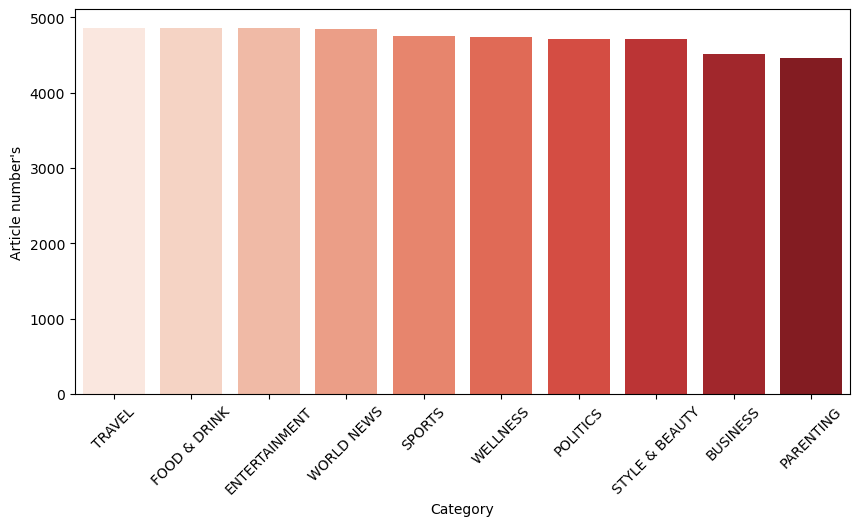

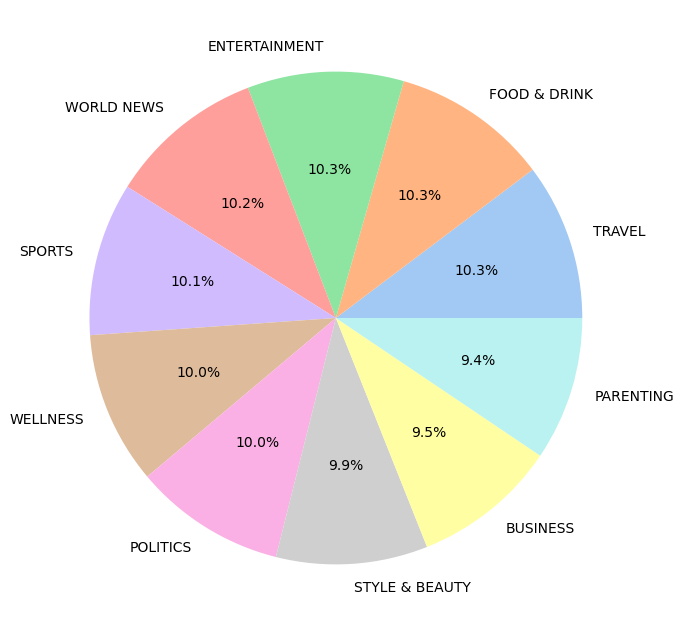

In [444]:
# plotting Bar Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="Reds")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Article number's")
plt.show()
# plotting Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.show()

C:\Users\numan\AppData\Local\Temp\ipykernel_17456\3078688946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="category", y="text_length", data=df, palette="Blues")


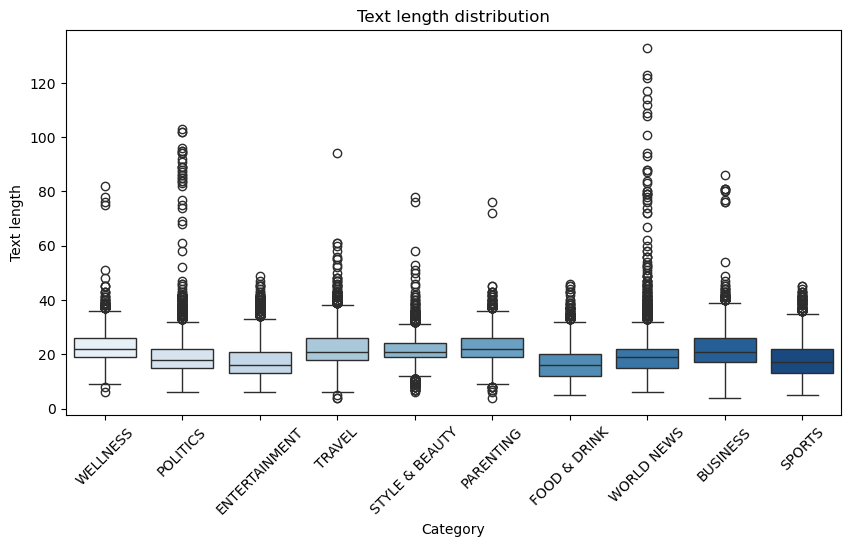

In [437]:
# Create a new column for text length
df["text_length"] = df["combined_text"].apply(lambda x: len(x.split()))

# Boxplot to compare text lengths per category
plt.figure(figsize=(10, 5))
sns.boxplot(x="category", y="text_length", data=df, palette="Blues")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Text length")
plt.title("Text length distribution")
plt.show()

## Modelling

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [257]:
# Encoding the category labels into numbers
le = LabelEncoder()
df["encoded_cat"] = le.fit_transform(df["category"])

In [261]:
# splitting into train and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["encoded_cat"], test_size = 0.2, random_state = 42)



In [265]:
X_train.shape, X_test.shape

((37865, 5000), (9467, 5000))

In [267]:
# Initialize models
lr = LogisticRegression(max_iter = 1000)
nb = MultinomialNB()


In [440]:
# Training models
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)


MultinomialNB()

In [271]:
# Predicting
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)


In [283]:
# Tune Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_log = {"C": [0.1, 1, 10, 100]}

# Perform GridSearchCV
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring="accuracy", n_jobs=-1)
grid_log.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Logistic Regression):", grid_log.best_params_)

# Train optimized model
best_log = grid_log.best_estimator_


Best Parameters (Logistic Regression): {'C': 1}


In [295]:
# Tune Naive Bayes

# Define parameter grid
param_grid_nb = {"alpha": [0.1, 0.5, 1, 5, 10]}

# Perform GridSearchCV
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring="accuracy", n_jobs=-1)
grid_nb.fit(X_train, y_train)

# Best parameters
print("Best Parameters (Naive Bayes):", grid_nb.best_params_)

# Train optimized model
best_nb = grid_nb.best_estimator_

Best Parameters (Naive Bayes): {'alpha': 1}


In [312]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [326]:
# Define the number of folds

cv_folds = 5
# Logistic Regression Cross-Validation

log_cv_scores = cross_val_score(best_log, X_train, y_train, cv=cv_folds, scoring="accuracy")
print("Logistic Regression Cross-Validation Accuracy:", log_cv_scores.mean())

# Naive Bayes Cross-Validation
nb_cv_scores = cross_val_score(best_nb, X_train, y_train, cv=cv_folds, scoring="accuracy")
print("Naive Bayes Cross-Validation Accuracy:", nb_cv_scores.mean())


Logistic Regression Cross-Validation Accuracy: 0.7922355737488446
Naive Bayes Cross-Validation Accuracy: 0.7796645979136405


In [342]:
# Function to evaluate and print model performance

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
# Evaluate Logistic Regression
evaluate_model(best_log, X_test, y_test, "Logistic Regression")

# Evaluate Naive Bayes
evaluate_model(best_nb, X_test, y_test, "Naive Bayes")



 Model: Logistic Regression
Accuracy: 0.8055350163726629
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       908
           1       0.77      0.79      0.78       923
           2       0.85      0.85      0.85       987
           3       0.79      0.77      0.78       900
           4       0.78      0.74      0.76       955
           5       0.88      0.90      0.89       968
           6       0.87      0.85      0.86       903
           7       0.81      0.80      0.81       958
           8       0.73      0.79      0.76       969
           9       0.82      0.81      0.81       996

    accuracy                           0.81      9467
   macro avg       0.81      0.81      0.81      9467
weighted avg       0.81      0.81      0.81      9467

Confusion Matrix:
 [[689  13  22  17  50  14   6  22  44  31]
 [ 14 730   7  33  18  32  30  24  22  13]
 [ 13  12 838  17   3   9  20  37  33   5]
 [ 19  27  

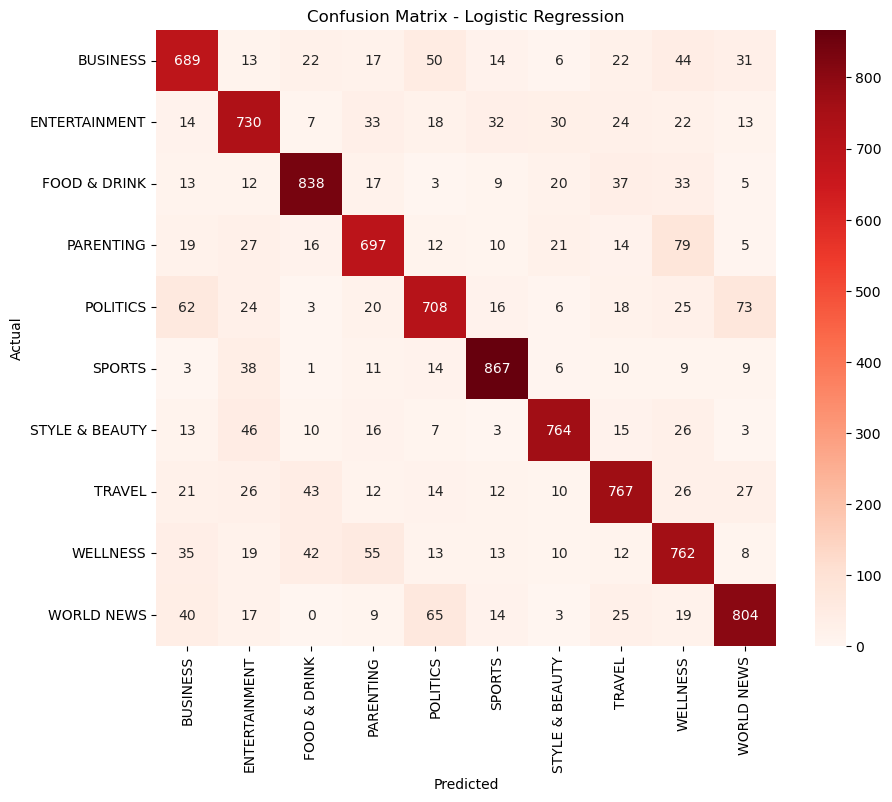

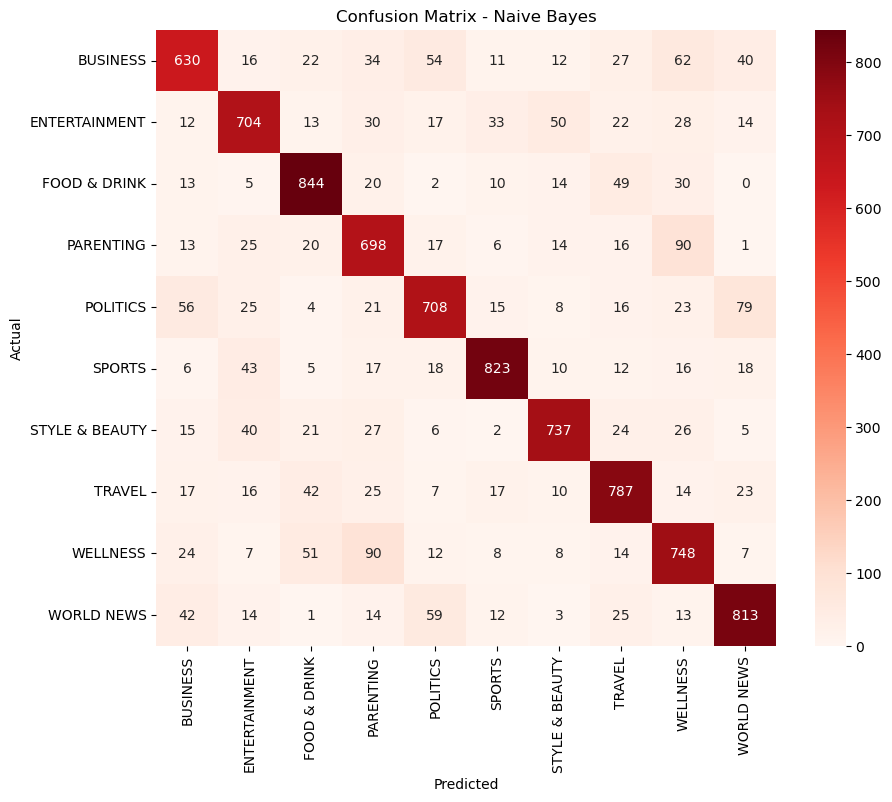

In [386]:
# Function to plot confusion matrix

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
# Plot for Logistic Regression
plot_confusion_matrix(best_log, X_test, y_test, "Logistic Regression")

# Plot for Naive Bayes
plot_confusion_matrix(best_nb, X_test, y_test, "Naive Bayes")



In [417]:
# Function to get model evaluation metrics
def get_model_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report["weighted avg"]["f1-score"]
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    return [accuracy, precision, recall, f1_score]
    
# Store results in a DataFrame
models = {
"Logistic Regression": best_log,
"Naive Bayes": best_nb
}

# Store results in a dictionary
results = {name: get_model_metrics(model, X_test, y_test) for name, model in models.items()}
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall","F1-Score"]).T # .T --> transposes the dataframe

# Display results
print("\n Model Comparison Table:------------------------------------")
print(df_results)


 Model Comparison Table:------------------------------------
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.805535   0.806218  0.805535  0.805644
Naive Bayes          0.791381   0.792743  0.791381  0.791478


In [446]:
# Select the best model based on highest F1-score

best_model = df_results["F1-Score"].idxmax()
print(f"\n The best model for News_Classification: {best_model}")


 The best model for News_Classification: Logistic Regression


## The Report
https://docs.google.com/document/d/1oMU_DmRw8DlozbNd0QOsoCc-MNsdKMtu/edit?usp=sharing&ouid=101091923509442736382&rtpof=true&sd=true

the video explanation link

https://drive.google.com/file/d/1e_HFK0Hbxj-B94CGyiuhuNRbZwUg25_y/view?usp=sharing

